#  KMeans Image Color Quantization for Social Impact in kenya

##  Overview
Images are an essential part of our digital world, used in everything from social media, education, healthcare to ecommerce websites.True-color images typically contain thousands of colors which makes storage, transmission, display and processing problematic. The  more images we use the more issues we face with website load times, storage space and bandwidth strains. This is where color quantization comes in.

Color quantization is the process of reducing the amount of color in an image in the case where the visual error between the original image and the quantized image is low.

## How K-means provides Image Quantization
The color pixels in an image are represented by their RGB values, which each range from 0 to 255. Since each color band has 256=2⁸ settings, there are a total of 256 ⋅ 256 ⋅ 256 = 256³ = 2²⁴ ~ 17 million colors. To represent each of these colors for any pixel, computers need log₂(2²⁴) = 24 bits of storage space. If we use K-means to select 16 colors that we represent an entire image with, we only need log₂(16) = 4 bits. Therefore, by using K-means with k=16, we can compress the image size by a factor of 6!

Now that we understand the theory, let us dive into some code and visualizations.

## Business Problem
Kenya faces challenges with limited bandwidth, resouce-constrained healthcare and digital preservation of cultural heritage.These challenges stem partly from large file sizes produced from high resolution images.

Harnessing the power of KMeans, a clustering algorithm that uses matrix algebra computation to group similar colors by  reducing the euclidean distance between the vector points, the image size will be significantly reduced with a relatively small visual error. A quantized image can unlock so many benefits for a developing country, some of them haave been listed below:
<ol>
        <li> Reduced internet costs due to faster website load times especially for mobile data users in rural areas</li>
        <li> Increased access to telemedicine as smaller scan images can easily be transmitted for diagnosis</li>
        <li> Preservation and dissemination of Kenya's cultural heritage for future generations through digitization, archival of our cultural artifacts with minimal footprint, and sharing them online for educational fostering of awareness and appreciation of kenya's rich culture</li>
    <o/l>
        



## Data
The images in this data set were obtained from <a href="https://unsplash.com/">unsplash</a>.

## Metric of Success
To use KMeans to reduce the size of images with a small visual error.

## Experiment Design
1. Import the necessary libraries
2. Load the image and visualize
3. Flatten the image from3-dimensional to 2-dimensional array
4. Implement KMeans
5. Analyse the results
6. Conclusion
7. Recommendation

## Import the necessay Libraries

In [21]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import os
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

## Load the image

In [2]:
image_as_array = mpimg.imread("DATA/coconut.jpg")
#preview the image
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [3]:
#shape of image
image_as_array.shape

(1401, 934, 3)

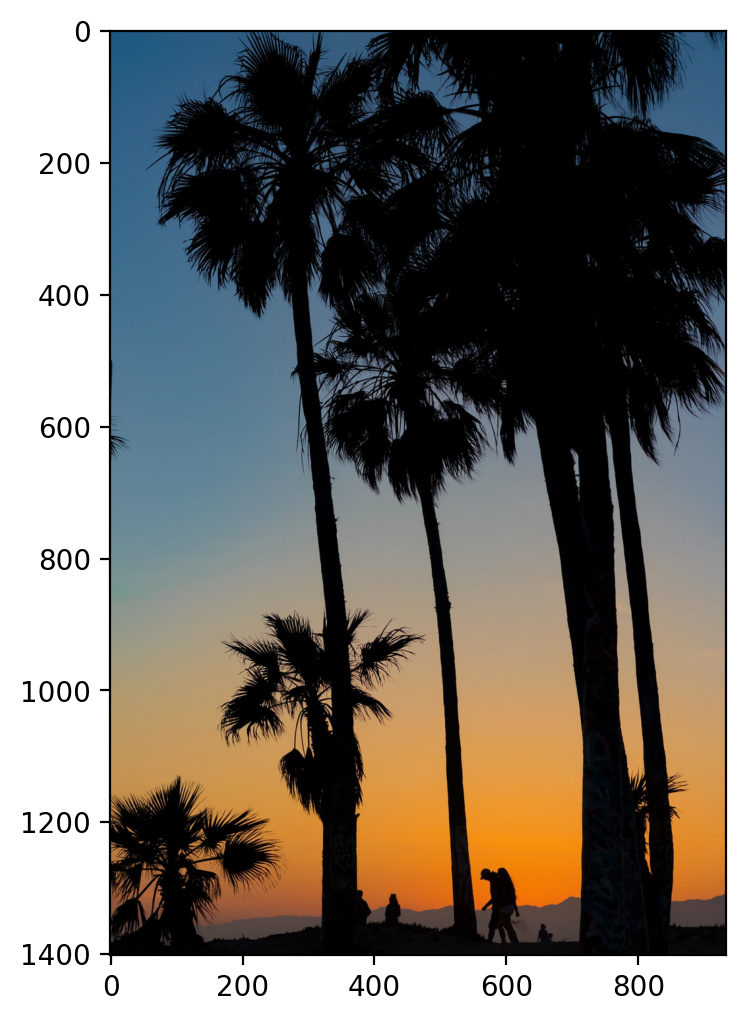

In [4]:
#display the image
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array);

## Flatten the image from 3-Dimensional to 2-Dimensional space
For an RGB image we have to first flatten the image from 3-dimensional to a 2-dimensional array because KMeans designed to only work in a 2D space. We will do this by multiplying the height and the Width of the dataset so that we have the pixels and the three color chanels with the help of NumPy's reshape function.

In [5]:
# flatten the image to 2D array h,w,c ---> h*W, c
#tuple unpack the 3D array
(h,w,c) = image_as_array.shape

In [17]:
#image height, width, color channels
print("Image height:",h)
print("Image width:",w)
print("color channels",c)
print("total image pixels", h*w)

Image height: 1401
Image width: 934
color channels 3
total image pixels 1308534


In [7]:
#the conversion
image_as_array_2d = np.asarray(image_as_array).reshape(-1,3)
image_as_array_2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [8]:
#confirm the flattening
print("image as array 3D length:", len(image_as_array.shape))
print("image as array 2D length:", len(image_as_array_2d.shape))

image as array 3D length: 3
image as array 2D length: 2


## 3 Dimensional plot of the image

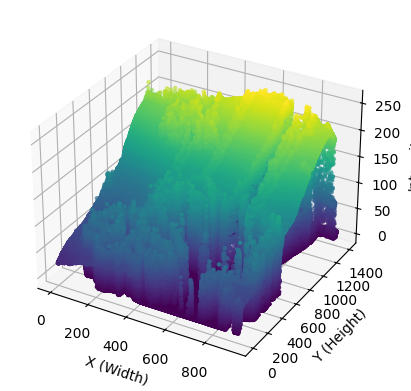

In [22]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Flatten the image array to obtain pixel coordinates and intensity values
x = np.arange(0, w, 1)
y = np.arange(0, h, 1)
x, y = np.meshgrid(x, y)
z = image_as_array[:,:,0].ravel()  

# Plot the 3D scatter plot
ax.scatter(x.ravel(), y.ravel(), z, c=z, cmap='viridis', marker='.')

# Set axis labels
ax.set_xlabel('X (Width)')
ax.set_ylabel('Y (Height)')
ax.set_zlabel('Intensity')
plt.savefig("3dplot.png", dpi=300)
# Show the plot
plt.show()

## Quantization with K-Means

The *KMeans* algorithm clusters data by trying to separate samples in *n* groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.<br>
**Approach**<br>
1. Choose the initial centroids, with the most basic method being to choose samples from the dataset<br> 
2. Assign each sample to its nearest centroid. 
3. Create new centroids by taking the mean value of all of the samples assigned to each previous centroid. 
4. The difference between the old and the new centroids are computed 
5. Repeat these last two steps(3,4) until the centroids do not move significantly.

### Calculate the optimal K value for the n_clusters using the Elbow method
For us to be able to get the optimal value for the number of clusters, we have to iteratively loop through the data while calculating the new centroids(means) and the new distances(intertia or sum-of-squares-within) until the data points can't shift significantly anymore.In this phase we  will first implement the Elbow method which uses the Euclidean distance:$d = \sqrt{{(x_2 - x_1)^2 + (y_2 - y_1)^2}}\$ and visualize the results  and pick the optimal value for the number of clusters to be used in KMeans at the point where the graph begins to form an elbow


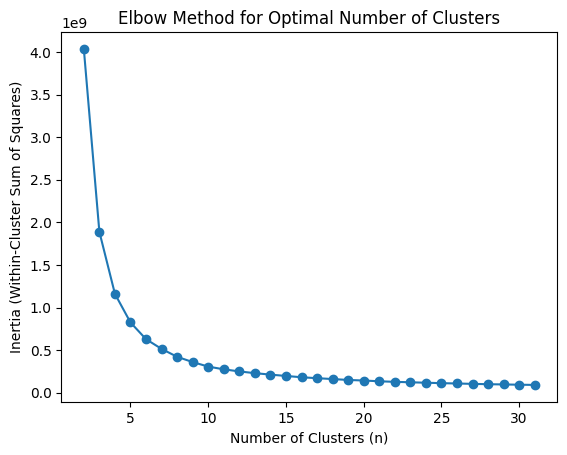

In [9]:
# Specify a range of cluster numbers (n). we will experiment with a range of 2,10
n_clusters_range = range(2, 32)  

# Store inertia (within-cluster sum of squares) for each value of n_clusters
inertia_values = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(image_as_array_2d)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to visualize the inertia values for different values of n_clusters
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (n)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

In [10]:
# Choose the value of n_clusters where the elbow occurs
best_n_clusters = 16  # Manually set the number based on the visual inspection of the elbow

print(f"The best number of clusters (n) is: {best_n_clusters}")

The best number of clusters (n) is: 16


From the above elbow plot we note that the optimal value for the clusters is 16.Lets initialize our model with n_clusters =16.

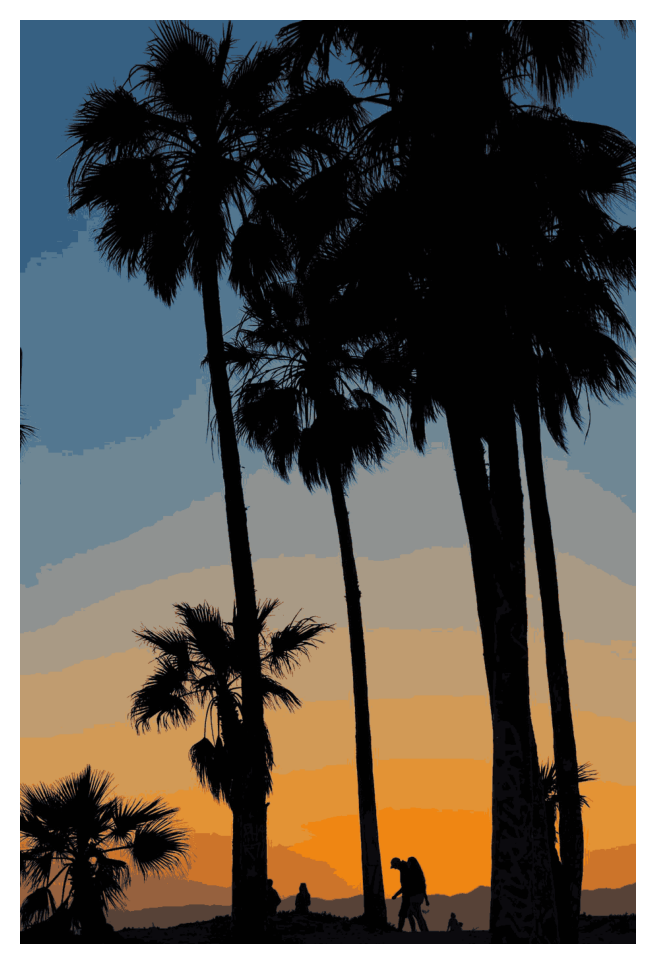

In [11]:
n_clusters = best_n_clusters

model = KMeans(n_clusters=best_n_clusters, random_state=42)  
#train and predict labels of the image
labels = model.fit_predict(image_as_array_2d)    
#preveiw the cluster centers 
rgb_codes = model.cluster_centers_.round(0).astype(int)    
#reshape the quantized image back to 3d
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))    
#display the quantized image
plt.figure(figsize=(6,6),dpi=200)
plt.axis("off")
plt.imshow(quantized_image);

From the visualized image, we note that the image a significant loss in image quality in comparison to the orignal image. this could be because of choosing a lower k value calcuated from the elbow method  or the presence of outliers in the image pixels distribution.The Elbow method has shortcomings especially if the clusters in the image data have irregular shapes or varying densities;the sum of squared distances may not be the reliable metric for determining the optimal number of clusters.<br>
In cases where the clusters hin the images have a significant difference, the SSD may not accurately reflect the quality oof clustering.<br>

For these reasons, we will use our domain knowledge to come up with the best clusters by looping over different clusters with the concept $2^n$ in bianary form. we will loop through 4 different clusters(32,64,128,256) to see if we get a favourable number of custers.

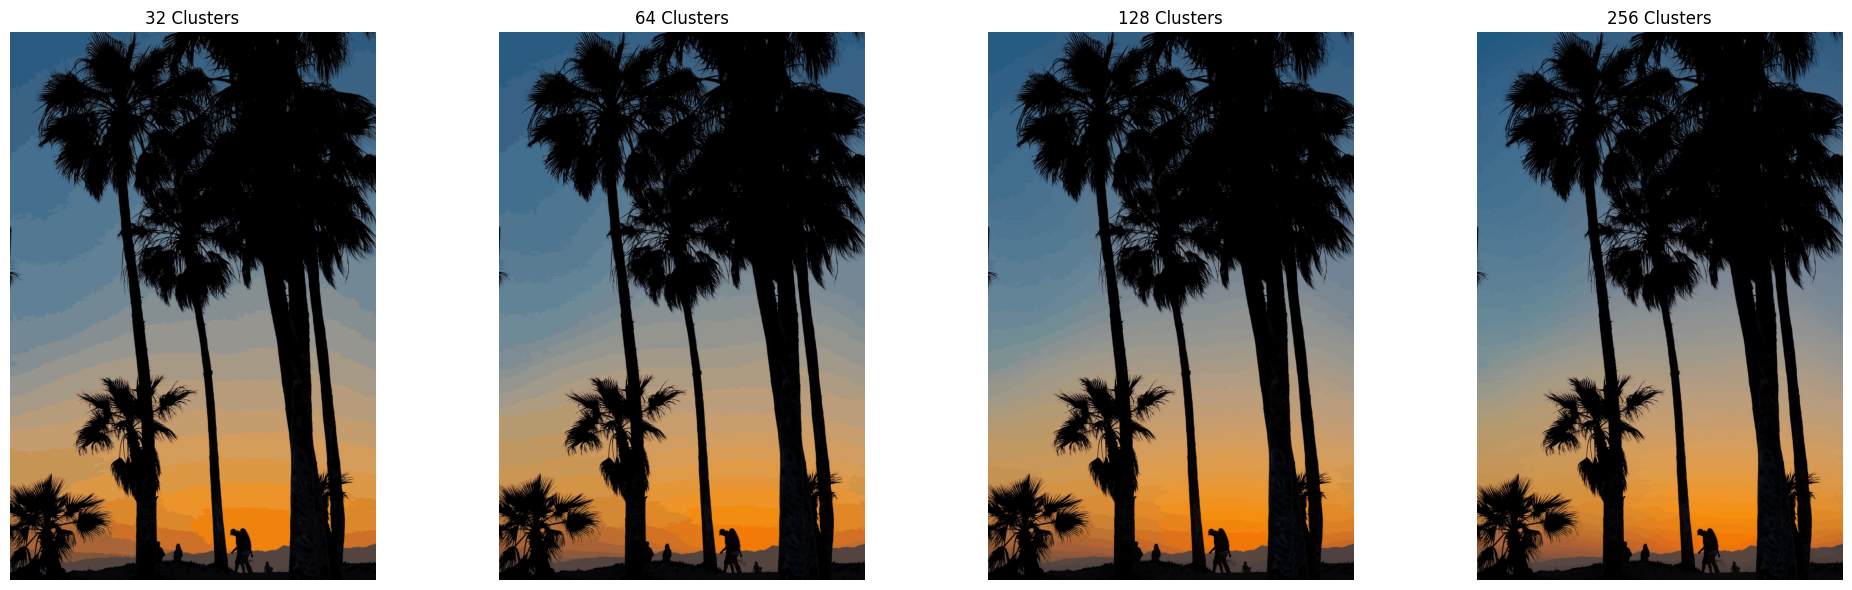

In [12]:
#nitilize a range of clusters
n_clusters = [32, 64, 128, 256]

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # Adjust figsize as needed

for i, n_cluster in enumerate(n_clusters):
    model = KMeans(n_clusters=n_cluster, random_state=42)
    labels = model.fit_predict(image_as_array_2d)
    rgb_codes = model.cluster_centers_.round(0).astype(int)
    quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

    # Add the quantized image to the corresponding subplot
    axes[i].imshow(quantized_image)
    axes[i].set_title(f"{n_cluster} Clusters")
    axes[i].axis('off')  # Remove axes for cleaner visualization

plt.tight_layout()  # Adjust spacing between subplots
plt.savefig("kmeans_compression_comparison.png", dpi=300)
plt.show()


We note a significant improvement on the color gradient smoothening as we increase the size of clusters.The color detail increases and the color regions increase ultimately reducing the visual error significantly. This however comes with a cost in terms of the computation time and resources, and the resulting of larger files. Lets check the sizes of the generated images and compare them to the original one

Image Size and Compression Ratio Comparison


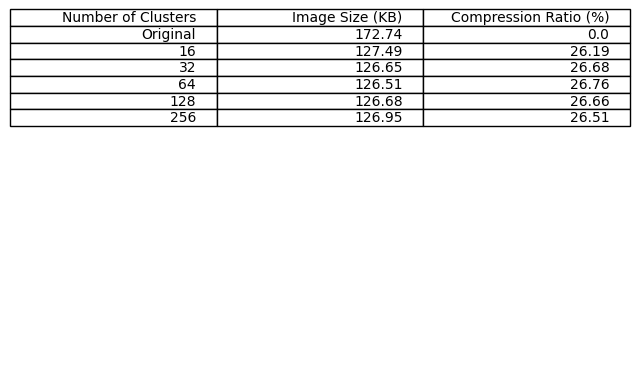

In [16]:
# Load the image
image_path = "DATA/coconut.jpg"  
image = Image.open(image_path)
image_as_array_2d = np.asarray(image).reshape(-1, 3)

# Get the original image size in kilobytes using os.stat
original_size = os.stat(image_path).st_size / 1024

# Define clusters to test
n_clusters = [16, 32, 64, 128, 256]

# Create a table to store results (starting with original)
table_data = [["Number of Clusters", "Image Size (KB)", "Compression Ratio (%)"]]
table_data.append(["Original", f"{original_size:.2f}", 0.00])  # Original first

# Perform KMeans compression and calculate sizes for each cluster
for n_cluster in n_clusters:
    model = KMeans(n_clusters=n_cluster, random_state=42)
    labels = model.fit_predict(image_as_array_2d)
    rgb_codes = model.cluster_centers_.round(0).astype(int)
    quantized_image_array = np.reshape(rgb_codes[labels], (image.height, image.width, 3))

    # Convert quantized image array to PIL Image and save as JPEG
    quantized_image = Image.fromarray(quantized_image_array.astype(np.uint8))
    quantized_image.save(f"quantized_{n_cluster}_clusters.jpg", "JPEG")

    # Get compressed image size in kilobytes using os.stat
    compressed_size = os.stat(f"quantized_{n_cluster}_clusters.jpg").st_size / 1024

    # Calculate compression ratio as a percentage
    compression_ratio = 100 * (original_size - compressed_size) / original_size

    # Add results to the table
    table_data.append([n_cluster, f"{compressed_size:.2f}", f"{compression_ratio:.2f}"])
print("Image Size and Compression Ratio Comparison")
# Create the table using matplotlib
plt.figure(figsize=(8, 3))
plt.axis('off')
plt.table(cellText=table_data, loc="top")
fig.tight_layout()
plt.savefig("kmeans_compression rate.png", dpi=300)
plt.show()


Overally, the compressed image file size has reduced compared to the original one. The compressed image size also incresaes as you increase the number of clusters.

## Results Analysis   
The results of the 16,32,64,128 and 256 color clusters in the image color quatization were obtained.We note that the size of the image is generally smaller than the original image. An incresea in the number of clusters increases the size of the reproduced image.
As can be seen from the table and image visualizations above, a major advantage of color quantization is that the size of the RGB image is reduced, which greatly saves the storage space of the RGB image in the computer. When the computer processes the image, the RGB image with less memory can improve the processing speed and improve the research efficiency. 

## Conclusion

K-Means-based algorithms are applied to RGB coconut tree. In the experiment, the number of cluster centers was set to 16,32,64,128 and 256, respectively,and the experimental results were obtained. A comprehensive analysis of the results of  experiment yielded the following conclusions: 
1. The color quantization algorithm based on K-Means has better effect on color quantization of images. 
2. Color quantization of RGB images can reduce image size. 

Therefore, the result of using the color quantization algorithm based on K-Means has a smaller visual error and consumes less memory space. Color quantization not only enables RGB images to be reproduced in more low-performance devices, improves image usability, but also saves computer storage space and improves image processing  and transmission over the internet efficiency.
